In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('train.csv')
data.head(20)

y = data['RiskScore']
X = data.drop('RiskScore', axis=1)

data.drop('RiskScore', axis=1, inplace=True)

In [5]:
data[[col for col in data.columns]].isna().sum()

ApplicationDate                530
Age                            530
AnnualIncome                   530
CreditScore                   1031
LoanAmount                    1031
LoanDuration                   530
MaritalStatus                  530
NumberOfDependents             530
HomeOwnershipStatus            530
MonthlyDebtPayments           1031
CreditCardUtilizationRate      530
NumberOfOpenCreditLines        530
NumberOfCreditInquiries        530
DebtToIncomeRatio              530
BankruptcyHistory             1031
LoanPurpose                   1031
PreviousLoanDefaults           530
PaymentHistory                 530
LengthOfCreditHistory          530
SavingsAccountBalance          530
CheckingAccountBalance        1031
TotalAssets                   1031
TotalLiabilities               530
MonthlyIncome                  530
UtilityBillsPaymentHistory     530
JobTenure                      530
EmploymentStatus               530
EducationLevel                 530
Experience          

In [6]:
numerical_features = data.select_dtypes(exclude='object')
numerical_features

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,27.0,66829.0,549.0,17290.0,60.0,1.0,1095.0,0.151985,2.0,1.0,...,5569.083333,0.908289,4.0,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0
1,55.0,172147.0,850.0,16110.0,36.0,1.0,211.0,0.175693,3.0,0.0,...,14345.583333,0.797339,2.0,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0
2,51.0,300000.0,850.0,38436.0,36.0,0.0,546.0,0.444605,3.0,0.0,...,25000.000000,0.915945,3.0,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0
3,25.0,34683.0,847.0,19186.0,48.0,0.0,153.0,0.188452,7.0,0.0,...,2890.250000,0.876416,3.0,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0
4,55.0,300000.0,850.0,30437.0,48.0,2.0,562.0,0.273431,3.0,1.0,...,25000.000000,0.888689,5.0,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,57.0,300000.0,850.0,14756.0,48.0,2.0,620.0,0.477742,1.0,3.0,...,25000.000000,0.786244,4.0,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0
11013,28.0,15000.0,300.0,51361.0,96.0,1.0,696.0,0.322554,2.0,0.0,...,1250.000000,0.738173,3.0,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0
11014,23.0,15000.0,302.0,30724.0,72.0,3.0,413.0,0.497062,2.0,0.0,...,1250.000000,0.761952,3.0,0.0,250778.0,0.404724,0.360670,1047.672294,1.168538,0.0
11015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
categorical_features = data.select_dtypes(include='object').drop(columns=['ApplicationDate'])
categorical_features.nunique()

MaritalStatus          4
HomeOwnershipStatus    4
LoanPurpose            5
EmploymentStatus       3
EducationLevel         5
dtype: int64

In [8]:
data['EmploymentStatus'].describe()

count        10487
unique           3
top       Employed
freq          9059
Name: EmploymentStatus, dtype: object

In [9]:
data[data['EmploymentStatus'] == 'Unemployed']['MonthlyIncome'].describe()

count      436.000000
mean     10863.362003
std       9475.146134
min       1250.000000
25%       1791.791667
50%       7204.166667
75%      22346.687500
max      25000.000000
Name: MonthlyIncome, dtype: float64

In [10]:
data[data['EmploymentStatus'] == 'Employed']['MonthlyIncome'].describe()

count     9059.000000
mean     10846.935460
std       9385.704677
min       1250.000000
25%       1669.416667
50%       7390.500000
75%      21190.333333
max      25000.000000
Name: MonthlyIncome, dtype: float64

In [11]:
data[data['EmploymentStatus'] == 'Self-Employed']['MonthlyIncome'].describe()

count      992.000000
mean     10755.129200
std       9357.596212
min       1250.000000
25%       1711.333333
50%       7362.833333
75%      21264.145833
max      25000.000000
Name: MonthlyIncome, dtype: float64

<Axes: xlabel='None', ylabel='MonthlyIncome'>

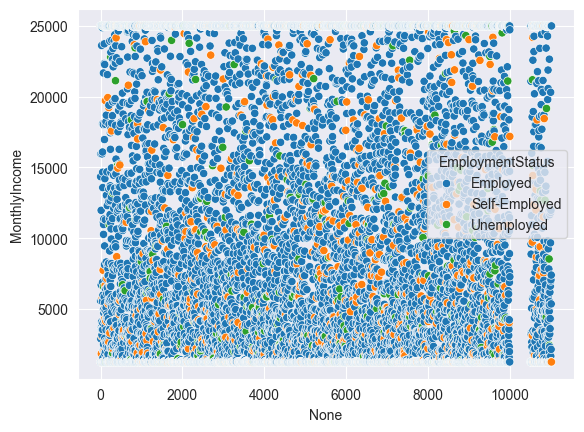

In [12]:
sns.scatterplot(x = data.index, y = data['MonthlyIncome'], color = 'blue', hue = data['EmploymentStatus'])

<Axes: xlabel='None', ylabel='MonthlyIncome'>

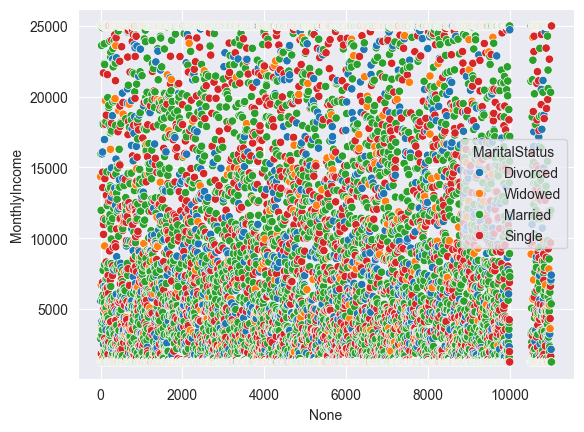

In [13]:
sns.scatterplot(data=data, x =data.index, y = data['MonthlyIncome'], hue = data['MaritalStatus'])

<Axes: ylabel='MonthlyIncome'>

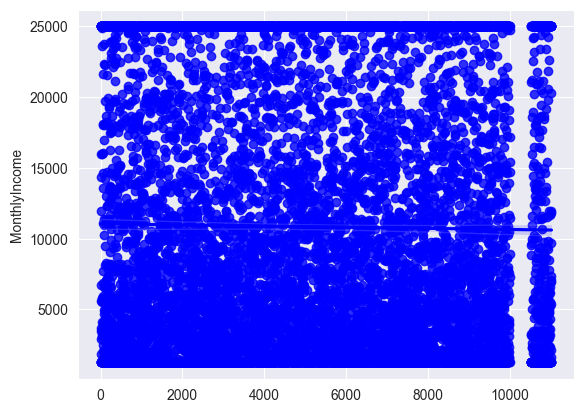

In [14]:
sns.regplot(x = data.index, y = data['MonthlyIncome'], color = 'blue')

<Axes: xlabel='EmploymentStatus', ylabel='MonthlyIncome'>

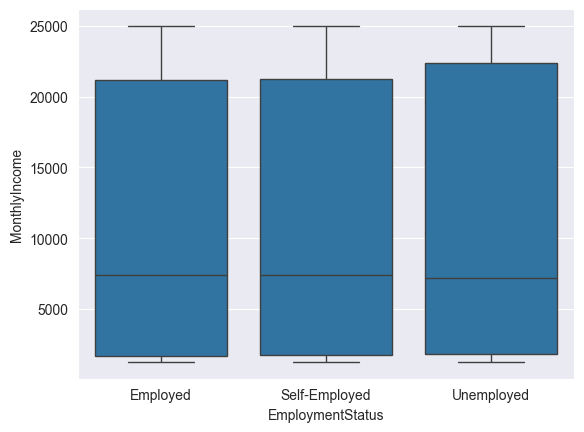

In [15]:
sns.boxplot(data = data, x = 'EmploymentStatus', y = 'MonthlyIncome')

In [16]:
data.cov()

ValueError: could not convert string to float: '2010-06-26'

In [19]:
employment_status_salary = data.groupby('EmploymentStatus')['MonthlyIncome'].describe()
employment_status_salary

,count,mean,std,min,25%,50%,75%,max
EmploymentStatus,,,,,,,,
Employed,9059.0,10846.935460,9385.704677,1250.0,1669.416667,7390.500000,21190.333333,25000.0
Self-Employed,992.0,10755.129200,9357.596212,1250.0,1711.333333,7362.833333,21264.145833,25000.0
Unemployed,436.0,10863.362003,9475.146134,1250.0,1791.791667,7204.166667,22346.687500,25000.0


In [21]:
material_status_salary = data.groupby('MaritalStatus')['MonthlyIncome'].describe()
material_status_salary

,count,mean,std,min,25%,50%,75%,max
MaritalStatus,,,,,,,,
Divorced,1562.0,10958.091443,9291.638220,1250.0,1859.750000,7676.916667,21094.479167,25000.0
Married,5145.0,10803.650470,9416.713379,1250.0,1576.583333,7255.666667,21251.416667,25000.0
Single,3217.0,10831.881359,9399.441868,1250.0,1741.916667,7353.416667,21507.833333,25000.0
Widowed,563.0,10871.082593,9308.776774,1250.0,1794.708333,7821.500000,20945.250000,25000.0


In [24]:
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('train.csv')

df.drop('ApplicationDate', axis=1, inplace=True)
label_encoder = LabelEncoder()

df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])
df['EmploymentStatus'] = label_encoder.fit_transform(df['EmploymentStatus'])
df['HomeOwnershipStatus'] = label_encoder.fit_transform(df['HomeOwnershipStatus'])
df['LoanPurpose'] = label_encoder.fit_transform(df['LoanPurpose'])
df['EducationLevel'] = label_encoder.fit_transform(df['EducationLevel'])

df

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,27.0,66829.0,549.0,17290.0,60.0,0,1.0,3,1095.0,0.151985,...,0,0,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,55.0,172147.0,850.0,16110.0,36.0,3,1.0,0,211.0,0.175693,...,0,3,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,51.0,300000.0,850.0,38436.0,36.0,1,0.0,0,546.0,0.444605,...,0,1,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,25.0,34683.0,847.0,19186.0,48.0,1,0.0,1,153.0,0.188452,...,0,3,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,55.0,300000.0,850.0,30437.0,48.0,2,2.0,3,562.0,0.273431,...,0,1,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,57.0,300000.0,850.0,14756.0,48.0,1,2.0,2,620.0,0.477742,...,0,0,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,28.0,15000.0,300.0,51361.0,96.0,2,1.0,2,696.0,0.322554,...,0,1,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170
11014,23.0,15000.0,302.0,30724.0,72.0,1,3.0,3,413.0,0.497062,...,1,0,0.0,250778.0,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707
11015,NaN,NaN,NaN,NaN,NaN,4,NaN,4,NaN,NaN,...,3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
corr = df.corr()

target_corr = corr['RiskScore']
target_corr.sort_values(ascending=False)

RiskScore                     1.000000
PaymentHistory                0.019144
TotalDebtToIncomeRatio        0.013879
MonthlyLoanPayment            0.012366
LoanAmount                    0.011771
NumberOfCreditInquiries       0.011055
NetWorth                      0.008804
TotalAssets                   0.008092
SavingsAccountBalance         0.007611
CreditCardUtilizationRate     0.005501
BankruptcyHistory             0.005184
JobTenure                     0.003822
HomeOwnershipStatus           0.003730
InterestRate                  0.003388
CreditScore                   0.002383
BaseInterestRate              0.002081
LoanPurpose                   0.001285
NumberOfOpenCreditLines       0.000730
CheckingAccountBalance       -0.000648
MaritalStatus                -0.000722
EducationLevel               -0.000888
MonthlyDebtPayments          -0.001871
LoanDuration                 -0.001880
Age                          -0.004648
TotalLiabilities             -0.004976
Experience               

(array([34.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.02331441,  0.07901703,  0.18134847,  0.28367991,  0.38601135,
         0.48834279,  0.59067423,  0.69300568,  0.79533712,  0.89766856,
         1.        ]),
 <BarContainer object of 10 artists>)

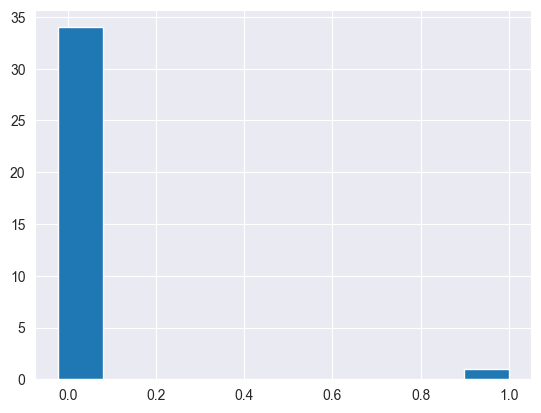

In [47]:
plt.hist(target_corr)

In [48]:
plt.figure(figsize = (100,100))
sns.heatmap(corr, annot=True)

<Axes: >